In [1]:
import pandas as pd
import numpy as np

from matplotlib_venn import venn2
import matplotlib.pyplot as plt


In [2]:
# import cinful and micsearch data
cinful = pd.read_csv("data/20230622_cinful10_best_hits.csv")
cinful = cinful[cinful['hmmerHit']==True]
cinful = cinful[cinful['component'] == 'microcins.verified']
# select unique seq
cinful = cinful.drop_duplicates(subset=['seq'])


In [3]:
micsearch = pd.read_csv("data/unprocessed_output.csv")
micsearch = micsearch.drop_duplicates(subset=['seq'])


In [4]:
# cinful_set = set(cinful['seq'])
# micsearch_set = set(micsearch['seq'])


In [5]:
# # generate fasta file from cinful['seq']
# cinful_fasta = open('data/clustering/cinful_unique.fasta', 'w')
# for i in range(len(cinful)):
#     cinful_fasta.write('>cinful_'+str(i+1)+'\n')
#     cinful_fasta.write(cinful.iloc[i]['seq']+'\n')
# cinful_fasta.close()

# micsearch_fasta = open('data/clustering/micsearch_unique.fasta', 'w')
# for i in range(len(micsearch)):
#     micsearch_fasta.write('>micsearch_'+str(i+1)+'\n')
#     micsearch_fasta.write(micsearch.iloc[i]['seq']+'\n')
# micsearch_fasta.close()


In [6]:
# read fasta file to list of seq
from Bio import SeqIO

cinful_fasta = list(SeqIO.parse("data/clustering/cinful_unique_rep_seq.fasta", "fasta"))
cinful_fasta = [str(seq.seq) for seq in cinful_fasta]

cinful_fasta_set = set(cinful_fasta)

micsearch_fasta = list(SeqIO.parse("data/clustering/micsearch_unique_rep_seq.fasta", "fasta"))
micsearch_fasta = [str(seq.seq) for seq in micsearch_fasta]

micsearch_fasta_set = set(micsearch_fasta)


In [7]:
# read fasta file cinful_unique.fasta
from Bio import SeqIO

cinful_fasta = list(SeqIO.parse("data/clustering/cinful_unique.fasta", "fasta"))
micsearch_fasta = list(SeqIO.parse("data/clustering/micsearch_unique.fasta", "fasta"))

#concatenate cinful and micsearch fasta
cinful_micsearch_fasta = cinful_fasta + micsearch_fasta
len(cinful_micsearch_fasta)


1080

In [8]:
# #cinful_micsearch_fasta to fasta file
# SeqIO.write(cinful_micsearch_fasta, "cinful_micsearch_unique_set.fasta", "fasta")


In [6]:
# run clustering on cinful_micsearch_unique_set.fasta
import subprocess

def run_mmseqs2(input_file, output_file):
    # Define the mmseqs2 command
    # mmseqs2_command = f"mmseqs easy-cluster {input_file} {output_file} tmp --min-seq-id 0.5 --remove-tmp-files 1 --sort-results 1"
    # mmseqs2_command = f"mmseqs easy-cluster {input_file} {output_file} tmp --remove-tmp-files 1 --sort-results 1 -s 7.5"
    mmseqs2_command = f"mmseqs linclust {input_file} {output_file} tmp --cov-mode 1 --min-seq-id 0.5"

    # Execute the mmseqs2 command using subprocess
    subprocess.run(mmseqs2_command, shell=True, check=True)

# make directory for mmseqs2 output
subprocess.run("mkdir -p tmp/linclust", shell=True, check=True)

# Example usage
input_file = "data/clustering/cinful_micsearch_unique_set.fasta"
output_file = "tmp/linclust/cf_ms_linclust_new"

# set seed for mmseqs
np.random.seed(42)

# run createdb
subprocess.run(f"mmseqs createdb {input_file} tmp/temp.db", shell=True, check=True)

# run mmseqs2
run_mmseqs2("tmp/temp.db", output_file)



createdb data/clustering/cinful_micsearch_unique_set.fasta tmp/temp.db 

MMseqs Version:              	GITDIR-NOTFOUND
Max sequence length          	65535
Split seq. by length         	true
Database type                	0
Do not shuffle input database	true
Offset of numeric ids        	0
Compressed                   	0
Verbosity                    	3

Converting sequences
[
Time for merging files: 0h 0m 0s 130ms
Time for merging files: 0h 0m 0s 137ms
Time for merging files: 0h 0m 0s 3ms
Time for processing: 0h 0m 0s 584ms
kmermatcher tmp/temp.db tmp/18214127522836590150/pref --sub-mat blosum62.out --alph-size 13 --min-seq-id 0.5 --kmer-per-seq 21 --adjust-kmer-len 0 --mask 0 --mask-lower-case 0 --cov-mode 1 -k 0 -c 0.8 --max-seq-len 65535 --hash-shift 5 --split-memory-limit 0 --include-only-extendable 0 --skip-n-repeat-kmer 0 --threads 112 --compressed 0 -v 3 

Database size: 1080 type: Aminoacid
Reduced amino acid alphabet: (A S T) (C) (D B N) (E Q Z) (F Y) (G) (H) (I V) (K R) (L J M)

In [7]:
# mmseqs createtsv
subprocess.run(f"mmseqs createtsv tmp/temp.db tmp/temp.db tmp/linclust/cf_ms_linclust_new tmp/cf_ms_cluster.tsv", shell=True, check=True)


createtsv tmp/temp.db tmp/temp.db tmp/linclust/cf_ms_linclust_new tmp/cf_ms_cluster.tsv 

MMseqs Version:                 	GITDIR-NOTFOUND
First sequence as representative	false
Target column                   	1
Add full header                 	false
Sequence source                 	0
Database output                 	false
Threads                         	112
Compressed                      	0
Verbosity                       	3

Time for merging files: 0h 0m 0s 156ms
Time for processing: 0h 0m 0s 491ms


CompletedProcess(args='mmseqs createtsv tmp/temp.db tmp/temp.db tmp/linclust/cf_ms_linclust_new tmp/cf_ms_cluster.tsv', returncode=0)

In [8]:
# load unique_cluster/mmseqs_cinful_unique_cluster.tsv
mmseqs_cinful_unique_cluster = pd.read_csv("tmp/cf_ms_cluster.tsv", sep='\t', header=None)

# cluster by column 0
mmseqs_cinful_unique_cluster = mmseqs_cinful_unique_cluster.groupby(0).agg(lambda x: list(x))
mmseqs_cinful_unique_cluster


,1
0,
cinful_124,"[cinful_124, cinful_238, micsearch_75, micsear..."
cinful_129,"[cinful_129, cinful_318, cinful_390, micsearch..."
cinful_133,"[cinful_133, micsearch_414, cinful_384, micsea..."
cinful_146,"[cinful_146, cinful_176, cinful_272, cinful_16..."
cinful_165,"[cinful_165, cinful_358, cinful_231, micsearch..."
...,...
micsearch_79,"[micsearch_79, micsearch_543, micsearch_603, m..."
micsearch_83,"[micsearch_83, micsearch_62, cinful_19, cinful..."
micsearch_85,"[micsearch_85, micsearch_86, micsearch_73, mic..."


In [9]:
# add column cinful and column micsearch
mmseqs_cinful_unique_cluster['cinful'] = 0
mmseqs_cinful_unique_cluster['micsearch'] = 0
mmseqs_cinful_unique_cluster

# if column 1 contains 'cinful*', set cinful to 1
for i in range(len(mmseqs_cinful_unique_cluster[1])):
#    print(f'item {i}')
    for item in mmseqs_cinful_unique_cluster[1][i]:
        if 'cinful' in item:
#            print('hit')
            mmseqs_cinful_unique_cluster['cinful'][i] = 1
            continue
        if 'micsearch' in item:
            mmseqs_cinful_unique_cluster['micsearch'][i] = 1
            continue

# make new column, category
mmseqs_cinful_unique_cluster['category'] = ''
mmseqs_cinful_unique_cluster

#mmseqs_cinful_unique_cluster.loc[mmseqs_cinful_unique_cluster[1].apply(lambda x: 'cinful' in x), 'cinful'] = 1

# # if column 1 contains 'micsearch', set micsearch to 1
# mmseqs_cinful_unique_cluster.loc[mmseqs_cinful_unique_cluster[1].apply(lambda x: 'micsearch' in x), 'micsearch'] = 1

# mmseqs_cinful_unique_cluster

/tmp/ipykernel_3634051/4086097049.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmseqs_cinful_unique_cluster['cinful'][i] = 1
/tmp/ipykernel_3634051/4086097049.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmseqs_cinful_unique_cluster['micsearch'][i] = 1


,1,cinful,micsearch,category
0,,,,
cinful_124,"[cinful_124, cinful_238, micsearch_75, micsear...",1,1,
cinful_129,"[cinful_129, cinful_318, cinful_390, micsearch...",1,1,
cinful_133,"[cinful_133, micsearch_414, cinful_384, micsea...",1,1,
cinful_146,"[cinful_146, cinful_176, cinful_272, cinful_16...",1,1,
cinful_165,"[cinful_165, cinful_358, cinful_231, micsearch...",1,1,
...,...,...,...,...
micsearch_79,"[micsearch_79, micsearch_543, micsearch_603, m...",0,1,
micsearch_83,"[micsearch_83, micsearch_62, cinful_19, cinful...",1,1,
micsearch_85,"[micsearch_85, micsearch_86, micsearch_73, mic...",0,1,


In [10]:

for i in range(len(mmseqs_cinful_unique_cluster)):
    if mmseqs_cinful_unique_cluster['cinful'][i] == 1 and mmseqs_cinful_unique_cluster['micsearch'][i] == 1:
        mmseqs_cinful_unique_cluster['category'][i] = 'Both'
    if mmseqs_cinful_unique_cluster['cinful'][i] == 1 and mmseqs_cinful_unique_cluster['micsearch'][i] == 0:
        mmseqs_cinful_unique_cluster['category'][i] = 'Cinful v1'
    if mmseqs_cinful_unique_cluster['cinful'][i] == 0 and mmseqs_cinful_unique_cluster['micsearch'][i] == 1:
        mmseqs_cinful_unique_cluster['category'][i] = 'Cinful v2'

mmseqs_cinful_unique_cluster


/tmp/ipykernel_3634051/3515322847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmseqs_cinful_unique_cluster['category'][i] = 'Both'
/tmp/ipykernel_3634051/3515322847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmseqs_cinful_unique_cluster['category'][i] = 'Cinful v1'
/tmp/ipykernel_3634051/3515322847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmseqs_cinful_unique_cluster['category'][i] = 'Cinful v2'


,1,cinful,micsearch,category
0,,,,
cinful_124,"[cinful_124, cinful_238, micsearch_75, micsear...",1,1,Both
cinful_129,"[cinful_129, cinful_318, cinful_390, micsearch...",1,1,Both
cinful_133,"[cinful_133, micsearch_414, cinful_384, micsea...",1,1,Both
cinful_146,"[cinful_146, cinful_176, cinful_272, cinful_16...",1,1,Both
cinful_165,"[cinful_165, cinful_358, cinful_231, micsearch...",1,1,Both
...,...,...,...,...
micsearch_79,"[micsearch_79, micsearch_543, micsearch_603, m...",0,1,Cinful v2
micsearch_83,"[micsearch_83, micsearch_62, cinful_19, cinful...",1,1,Both
micsearch_85,"[micsearch_85, micsearch_86, micsearch_73, mic...",0,1,Cinful v2


In [12]:
# # make venn diagram from mmseqs_cinful_unique_cluster['category']
# from matplotlib_venn import venn2
# import matplotlib.pyplot as plt
# import numpy as np

# both_set = mmseqs_cinful_unique_cluster[mmseqs_cinful_unique_cluster['category']=='both']
# cinful_set = mmseqs_cinful_unique_cluster[mmseqs_cinful_unique_cluster['category']=='cinful']
# micsearch_set = mmseqs_cinful_unique_cluster[mmseqs_cinful_unique_cluster['category']=='micsearch']

# both_set = set(both_set.index.tolist())
# cinful_set = set(cinful_set.index.tolist())
# micsearch_set = set(micsearch_set.index.tolist())

# # combine cinful_set and both_set
# cinful_set = cinful_set | both_set

# micsearch_set = micsearch_set | both_set

# # venn diagram with left cinful_set, right micsearch_set, and intersection both_set
# # venn2([cinful_set, micsearch_set], set_labels = ('Cinful', 'MicSearch'), set_colors=('#F16512', '#5F9C3F'), alpha=0.75)

# # # move labels down
# # plt.gca().get_children()[6].set_y(-0.52)
# # plt.gca().get_children()[6].set_x(-0.25)

# # plt.gca().get_children()[7].set_y(-0.6)
# # plt.gca().get_children()[7].set_x(-0.05)

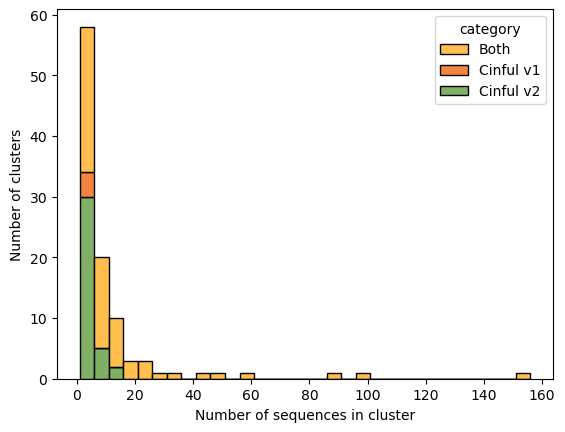

In [11]:
# make a barplot of the length of mmseqs_cinful_unique_cluster[1]
import seaborn as sns

# make a list of length of mmseqs_cinful_unique_cluster[1]
length_list = [len(x) for x in mmseqs_cinful_unique_cluster[1]]

# make a list of category
category_list = mmseqs_cinful_unique_cluster['category'].tolist()


# make a dataframe
length_df = pd.DataFrame({'length': length_list, 'category': category_list})

# x-axis label
plt.xlabel('Number of sequences in cluster')
plt.ylabel('Number of clusters')

# make a histogram
sns.histplot(data=length_df, x='length', hue='category', multiple='stack', bins=range(1,160,5), palette=['#FFAE22', '#F16512', '#5F9C3F'], alpha=0.8)

# mkdir plots
import os
if not os.path.exists('plots'):
    os.makedirs('plots')

# save figure
plt.savefig('plots/cluster_size_barplot.svg', bbox_inches='tight')
# plt.savefig('plots/cluster_size_barplot.png', dpi=300, bbox_inches='tight')


In [12]:
# import cinful and micsearch data
cinful = pd.read_csv("data/20230622_cinful10_best_hits.csv")
cinful = cinful[cinful['component'] == 'microcins.verified']
cinful = cinful[cinful['hmmerHit']==True]

micsearch = pd.read_csv("data/unprocessed_output.csv")

print(len(cinful))
print(len(micsearch))

# save cinful as cinful_testingnans.csv
#cinful.to_csv('cinful_testingnans.csv', index=False)

6427
11424


In [13]:
# make a dataframe of cinful
micsearch_locs = pd.DataFrame(micsearch['sample'])

# rename sample to contig
micsearch_locs = micsearch_locs.rename(columns={'sample': 'contig'})

# add column location and input
micsearch_locs['location'] = micsearch['location']
micsearch_locs['seq'] = micsearch['seq']

# split location by -
micsearch_locs['start'] = micsearch_locs['location'].apply(lambda x: x.split('-')[0].strip('['))
micsearch_locs['stop'] = micsearch_locs['location'].apply(lambda x: x.split('-')[1].split(']')[0].strip(']'))

# remove location column
micsearch_locs = micsearch_locs.drop(columns=['location'])

# add column 'search' and set to micsearch
micsearch_locs['search'] = 'micsearch'


In [14]:
cinful_locs = cinful[['contig', 'seq', 'start', 'stop']]

# add column 'search' and set to cinful
cinful_locs['search'] = 'cinful'

#drop nan
cinful_locs = cinful_locs.dropna()


/tmp/ipykernel_3634051/4107791190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cinful_locs['search'] = 'cinful'


In [15]:
# # save cinful_locs and micsearch_locs as csv
pd.concat([cinful_locs, micsearch_locs]).to_csv('cinful_micsearch_locs.csv', index=False)


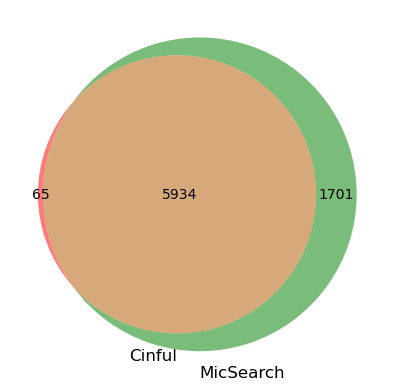

In [16]:
# find intersection of cinful_locs and micsearch_locs
cinful_locs_set = set(cinful_locs['contig'])
micsearch_locs_set = set(micsearch_locs['contig'])

cinful_locs_set
micsearch_locs_set

venn2([cinful_locs_set, micsearch_locs_set], set_labels = ('Cinful', 'MicSearch'), set_colors=('red', 'green'), alpha=0.52)

In [17]:
# # build a lookup table for contig lengths from raw assembly
# # open all contigs files in folder and get length of each contig
# import os
# import pandas as pd

# dir1 = '../../resources/Enterobacteriaceae_microcin/genbank/bacteria/'
# dir2 = '../../resources/Enterobacteriaceae_microcin/refseq/bacteria/'

# # get all contigs files
# contigs_folders = os.listdir(dir1)

# # get files inside contigs_folders that end in .fna and put in list
# contigs_files = []
# for folder in contigs_folders:
#     contigs_files += [folder+'/'+file for file in os.listdir(dir1+folder) if file.endswith('.fna')]


# # prepend dir1 to contigs_files
# contigs_files = [dir1+file for file in contigs_files]

# contigs_files

# from Bio import SeqIO

# # open file, read as fasta, get length of each contig, and put in dictionary with contig name
# genbank_contig_lengths = {}
# for file in contigs_files:
#     parsed_file = SeqIO.parse(file, 'fasta')
#     for record in parsed_file:
#         genbank_contig_lengths[record.id] = len(record.seq)

# genbank_contig_lengths



FileNotFoundError: [Errno 2] No such file or directory: '../../resources/Enterobacteriaceae_microcin/genbank/bacteria/'

In [20]:
# # build a lookup table for contig lengths from raw assembly
# # open all contigs files in folder and get length of each contig
# import os
# import pandas as pd

# dir1 = '../../resources/Enterobacteriaceae_microcin/genbank/bacteria/'
# dir2 = '../../resources/Enterobacteriaceae_microcin/refseq/bacteria/'

# # get all contigs files
# contigs_folders = os.listdir(dir2)

# # get files inside contigs_folders that end in .fna and put in list
# contigs_files = []
# for folder in contigs_folders:
#     contigs_files += [folder+'/'+file for file in os.listdir(dir2+folder) if file.endswith('.fna')]


# # prepend dir1 to contigs_files
# contigs_files = [dir2+file for file in contigs_files]

# contigs_files

# from Bio import SeqIO

# # open file, read as fasta, get length of each contig, and put in dictionary with contig name
# refseq_contig_lengths = {}
# for file in contigs_files:
#     parsed_file = SeqIO.parse(file, 'fasta')
#     for record in parsed_file:
#         refseq_contig_lengths[record.id] = len(record.seq)

# refseq_contig_lengths



In [21]:
# # merge genbank_contig_lengths and refseq_contig_lengths
# all_contig_lengths = {**genbank_contig_lengths, **refseq_contig_lengths}
# print(len(genbank_contig_lengths))
# print(len(refseq_contig_lengths))
# print(len(all_contig_lengths))


In [22]:
# # make all_contig_lengths_df
# all_contig_lengths_df = pd.DataFrame.from_dict(all_contig_lengths, orient='index', columns=['length'])
# all_contig_lengths_df.index.name = 'contig'

# # save all_contig_lengths_df as csv
# all_contig_lengths_df.to_csv('all_contig_lengths.csv')


In [18]:
# load all_contig_lengths_df from csv
all_contig_lengths_df = pd.read_csv('data/all_contig_lengths.csv', index_col='contig')

#all_contig_lengths_df to dictionary
all_contig_lengths = all_contig_lengths_df.to_dict()['length']

In [19]:
all_locs = pd.concat([cinful_locs, micsearch_locs])


In [20]:
# add new column to all_locs, length
all_locs['length'] = all_locs['contig'].apply(lambda x: all_contig_lengths[x])

# make two new rows, reverse_start and reverse_stop
all_locs['reverse_stop'] = all_locs['length'] - all_locs['stop'].astype(int) + 1
all_locs['reverse_start'] = all_locs['length'] - all_locs['start'].astype(int) + 1

all_locs

,contig,seq,start,stop,search,length,reverse_stop,reverse_start
0,NZ_WFLV01000017.1,MKELTFNEMESVSGGFNLVSAATGFASFVANSAAGFTSFALTSGLA...,34944,35276,cinful,105365,70090,70422
1,NZ_PQLE01000001.1,MKELTANEMEYISGAGIIDLPCALVDFTIQSALGLVAAGINAGMIL...,583670,583996,cinful,763640,179645,179971
2,NZ_PIBQ01000010.1,MKELTANEMEYISGAGIIDLPCALVDFTIQSALGLVAAGINAGMIL...,85423,85749,cinful,212089,126341,126667
3,NZ_RPDW01000008.1,MKELTANEMEYISGAGIIDLPCALVDFTIQSALGLVAAGINAGMIL...,135594,135920,cinful,241808,105889,106215
4,NZ_JAFHXZ010000003.1,MKELTANEMEYISGAGIIDLPCALVDFTIQSALGLVAAGINAGMIL...,178842,179168,cinful,500790,321623,321949
...,...,...,...,...,...,...,...,...
11419,NZ_CP077279.1,MQQLTAFEMENISGGTISLENLANGLLDAATFVAKEAGAGIIGAAI...,4861113,4861532,micsearch,5243269,381738,382157
11420,NZ_CAAHGD010000008.1,MQQLTAFEMENISGGTISLENLANGLLDAATFVAKEAGAGIIGAAI...,197221,197640,micsearch,349739,152100,152519
11421,NMPY01000023.1,MQQLTAFEMENISGGTISLENLANGLLDAATFVAKEAGAGIIGAAI...,22110,22562,micsearch,75984,53423,53875
11422,NZ_BIKC01000014.1,MHQLTVFEMEEISGGALTDTLTDIVTWAAKEMGAVALGASLGAIIG...,161136,161516,micsearch,161631,116,496


In [26]:
# all_locs.to_csv('data/all_locs.csv', index=False)

17851 17032


/tmp/ipykernel_3634051/1009676407.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cinful_locs['stop'] = cinful_locs['stop'].astype(int)
/tmp/ipykernel_3634051/1009676407.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cinful_locs['reverse_stop'] = cinful_locs['reverse_stop'].astype(int)


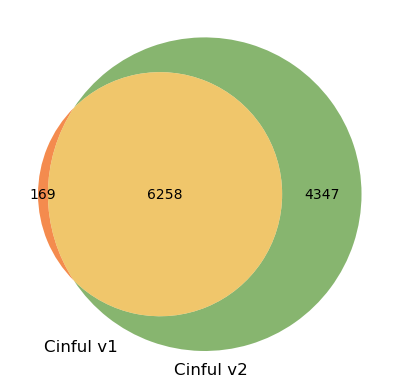

In [21]:
# import venn2
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# all_locs = pd.read_csv('data/all_locs_.csv')

# split all_locs to cinful_locs and micsearch_locs
cinful_locs = all_locs[all_locs['search']=='cinful']
micsearch_locs = all_locs[all_locs['search']=='micsearch']
# remove duplicates from cinful_locs and micsearch_locs
micsearch_locs = micsearch_locs.drop_duplicates(subset=['contig', 'stop'])
print(len(all_locs), len(cinful_locs) + len(micsearch_locs))

# make all stop and reverse_stop int
cinful_locs['stop'] = cinful_locs['stop'].astype(int)
micsearch_locs['stop'] = micsearch_locs['stop'].astype(int)
cinful_locs['reverse_stop'] = cinful_locs['reverse_stop'].astype(int)
micsearch_locs['reverse_stop'] = micsearch_locs['reverse_stop'].astype(int)


# identify where cinful_locs and micsearch_locs overlap for contig and stop
cinful_locs_set = set(cinful_locs[['contig', 'stop']].apply(tuple, axis=1))
micsearch_locs_set = set(micsearch_locs[['contig', 'stop']].apply(tuple, axis=1))


# # identify where cinful_locs and micsearch_locs overlap for contig and start to reverse_stop
# cinful_locs_set = set(cinful_locs[['contig', 'start']].apply(tuple, axis=1))
# micsearch_locs_set = set(micsearch_locs[['contig', 'reverse_stop']].apply(tuple, axis=1))

#venn2([cinful_locs_set, micsearch_locs_set], set_labels = ('Cinful', 'MicSearch'), set_colors=('red', 'green'), alpha=0.52)


# Generate venn diagram with numbers
venn2([169,4347,6258], set_labels = ('Cinful v1', 'Cinful v2'), set_colors=('#F16512', '#5F9C3F'), alpha=0.75)

# move labels down
plt.gca().get_children()[6].set_y(-0.52)
plt.gca().get_children()[6].set_x(-0.25)

plt.gca().get_children()[7].set_y(-0.6)
plt.gca().get_children()[7].set_x(-0.05)

# save figure
plt.savefig('plots/venn_diagram.svg', bbox_inches='tight')
# plt.savefig('plots/venn_diagram.png', dpi=300, bbox_inches='tight')